### gold price prediction 


In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 


###data collection and preprocessing


In [23]:
gold_df=pd.read_csv("/content/gld_price_data.csv")
print(gold_df)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [24]:
gold_df.shape

(2290, 6)

In [25]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
correlation =gold_df.corr()

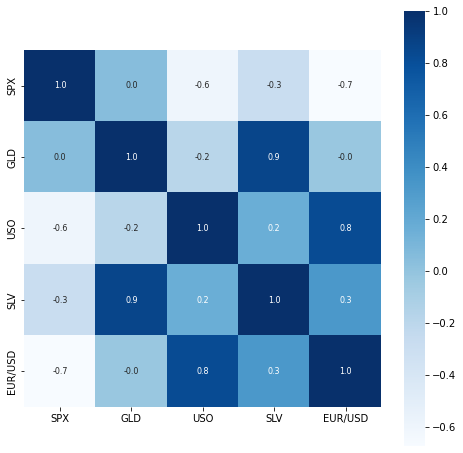

In [8]:

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True , fmt='.1f', annot=True, annot_kws={"size":8}, cmap='Blues')

In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


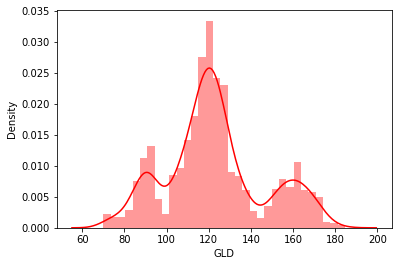

In [10]:
sns.distplot(gold_df['GLD'],color="red")

In [11]:
x = gold_df.drop(['Date','GLD'], axis=1)
y = gold_df['GLD']

In [12]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [17]:
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.51219926  81.9466999  116.26770008 127.73400072 120.85990089
 154.82119751 149.95589825 125.94310028 117.66489858 125.80550099
 116.48200144 172.41440093 141.20429941 168.00019866 115.32429981
 117.65860065 139.10990255 170.13750054 159.86800244 156.32569979
 155.11049996 125.22029984 176.27190046 156.68540407 125.18610044
  93.75919988  78.10010009 120.63050005 119.16459949 167.57289932
  87.96990034 125.25670016  91.1296009  117.73220021 121.14599888
 136.41000114 115.51630118 114.85150083 148.76819972 107.19400108
 104.0901022   87.290398   126.59330046 117.84190036 153.86659896
 119.61320042 108.39079993 108.15459848  93.12910034 127.09299783
  74.64050042 113.49419922 121.35750037 111.17349938 118.73639882
 120.63949941 159.65020044 166.90600173 147.06409725  85.92269861
  94.21030044  86.81429881  90.54960008 118.92980103 126.47180056
 127.50010027 169.33169995 122.26889934 117.38099881  98.63190007
 168.02570119 142.73879887 132.11850278 121.15540251 120.51289943
 119.89490

In [19]:

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891571381773967


In [20]:
Y_test = list(Y_test)

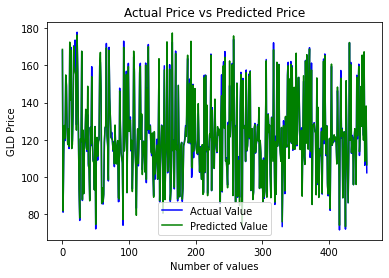

In [21]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()